In [9]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# CNN - MNIST Dataset

2


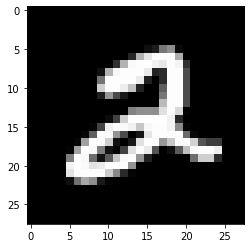

In [11]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[5])
plt.imshow(train_images[5], cmap="Greys_r")

In [12]:
# reshape data to (28,28,1)
# 1 is the nubmer of channels. MNIST is greyscale image.
data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000)
data = data.batch(128)
data = data.repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32)))
test_data = test_data.batch(10000)

In [21]:

# tf.keras.layers.Conv2D(
#     filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
#     dilation_rate=(1, 1), activation=None, use_bias=True,
#     kernel_initializer='glorot_uniform', bias_initializer='zeros',
#     kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
#     kernel_constraint=None, bias_constraint=None, **kwargs
# )

# tf.keras.layers.MaxPool2D(
#     pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs
# )

# tf.keras.layers.Dense(
#     units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
#     bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
#     activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
#     **kwargs
# )

train_steps = 1000
input_shape = (28, 28, 1)
model = tf.keras.Sequential()
# Conv layer 1
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
# conv layer 2
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
# flatten the layer to 7*7*32 = 1568
model.add(tf.keras.layers.Flatten())
# Dense layer 1
model.add(tf.keras.layers.Dense(256, activation='relu'))
# Dense layer 2
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

# Adam makes things much smoother
opt = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [19]:
for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        xent = loss_fn(lbl_batch, logits)

    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.2937443256378174 Accuracy: 0.140625
Loss: 0.2761182188987732 Accuracy: 0.890625
Loss: 0.1754944920539856 Accuracy: 0.9453125
Loss: 0.12722429633140564 Accuracy: 0.96875
Loss: 0.0945708155632019 Accuracy: 0.9765625
Loss: 0.10193199664354324 Accuracy: 0.9765625
Loss: 0.08609023690223694 Accuracy: 0.984375
Loss: 0.060191020369529724 Accuracy: 0.96875
Loss: 0.05293823778629303 Accuracy: 0.984375
Loss: 0.04334782063961029 Accuracy: 0.984375
Loss: 0.01373979076743126 Accuracy: 0.9921875


In [20]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9858999848365784


# CNN - CIFAR10 Dataset

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Train Data : {}'.format(x_train.shape))
print('Test Data : {}'.format(x_test))

170500096/170498071 [==============================] - 184s 1us/step
Train Data : (50000, 32, 32, 3)
Test Data : (10000, 32, 32, 3)


In [34]:
# reshape data to (32,32,3)
# 3 is the nubmer of channels. CIFAR-10 is RGB image.
data = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, y_train.astype(np.int32)))
data = data.shuffle(buffer_size=60000)
data = data.batch(128)
data = data.repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (x_test.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, y_test.astype(np.int32)))
test_data.batch(128)


<BatchDataset shapes: ((None, 32, 32, 3), (None, 1)), types: (tf.float32, tf.int32)>

In [49]:
train_steps = 2000
input_shape = (32, 32, 3)
model = tf.keras.Sequential()
# Conv layer 1
model.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
# conv layer 2
model.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
# conv layer 2
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
# flatten the layer to 4*4*64 = 1024
model.add(tf.keras.layers.Flatten())
# Dense layer 1
model.add(tf.keras.layers.Dense(256, activation='relu'))
# Dense layer 2
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

# Adam makes things much smoother
opt = tf.optimizers.Adam()
# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1024)            

In [50]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (img_batch, lbl_batch) in enumerate(data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(img_batch)
        # loss format is generally: first argument targets, second argument outputs
        xent = loss_fn(lbl_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    varis = model.trainable_variables
    grads = tape.gradient(xent, varis)
      
    opt.apply_gradients(zip(grads, varis))
    
    train_acc_metric(lbl_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Loss: {} Accuracy: {}".format(xent, train_acc_metric.result()))
        train_acc_metric.reset_states()
    

Loss: 2.3014140129089355 Accuracy: 0.15625
Loss: 1.631751298904419 Accuracy: 0.28914061188697815
Loss: 1.6310293674468994 Accuracy: 0.41664063930511475
Loss: 1.5136134624481201 Accuracy: 0.46851563453674316
Loss: 1.4831602573394775 Accuracy: 0.49600061774253845
Loss: 1.2786078453063965 Accuracy: 0.5346875190734863
Loss: 1.1395777463912964 Accuracy: 0.5584375262260437
Loss: 1.0621386766433716 Accuracy: 0.5821874737739563
Loss: 0.9748655557632446 Accuracy: 0.5984159111976624
Loss: 1.0792893171310425 Accuracy: 0.6181250214576721
Loss: 0.9928085803985596 Accuracy: 0.6241406202316284
Loss: 0.9429254531860352 Accuracy: 0.6369531154632568
Loss: 0.8993628621101379 Accuracy: 0.6440558433532715
Loss: 0.8801581859588623 Accuracy: 0.6624218821525574
Loss: 0.7779927253723145 Accuracy: 0.6729687452316284
Loss: 0.8310056924819946 Accuracy: 0.6853125095367432
Loss: 0.6434568762779236 Accuracy: 0.6846768856048584
Loss: 0.8167835474014282 Accuracy: 0.7133593559265137
Loss: 0.7691630125045776 Accuracy: 0